In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
ls

Astros_reg.ipynb*  beat_geojson/  plot_func.py*
Astros_viz.ipynb*  data/          __pycache__/


In [14]:
ls 

Astros_reg.ipynb*  beat_geojson/  plot_func.py*
Astros_viz.ipynb*  data/          __pycache__/


In [15]:
path ='data/crime_astros_final.csv'

In [53]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
#df = df.set_index('date').sort_index(ascending=True)
df['game_on'] = np.where(df.game =='No Game',0,1)
df.drop(['game'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Data columns (total 15 columns):
date            23947 non-null datetime64[ns]
Beat            23947 non-null object
OffenseType     23947 non-null object
Premise         23947 non-null object
NumOffenses     23947 non-null float64
hour            23947 non-null int64
day             23947 non-null int64
weekday         23947 non-null object
month           23947 non-null object
year            23947 non-null int64
lat             23947 non-null float64
lon             23947 non-null float64
add             23947 non-null object
dist_stadium    23947 non-null float64
game_on         23947 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 2.7+ MB


In [127]:
df.head(2)

,date,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game_on
0,2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.137184,0
1,2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.549562,0


## Trim df

In [55]:
print(list(df.columns))

['date', 'Beat', 'OffenseType', 'Premise', 'NumOffenses', 'hour', 'day', 'weekday', 'month', 'year', 'lat', 'lon', 'add', 'dist_stadium', 'game_on']


In [56]:
df1 = df[['dist_stadium', 'game_on']]

## TEST1

In [107]:
one_mile =  df1.dist_stadium <= 1.0
df1m = df1[one_mile]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


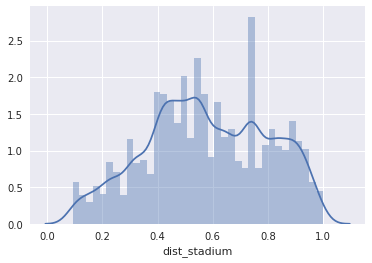

In [137]:

# find distribution of target column / trying to predict

sns.distplot(df1m['dist_stadium'])


In [138]:
df1m.corr()

,dist_stadium,game_on
dist_stadium,1.000000,-0.083477
game_on,-0.083477,1.000000


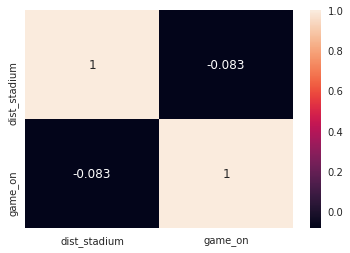

In [139]:
sns.heatmap(df1m.corr(),annot=True)

## Pairplot

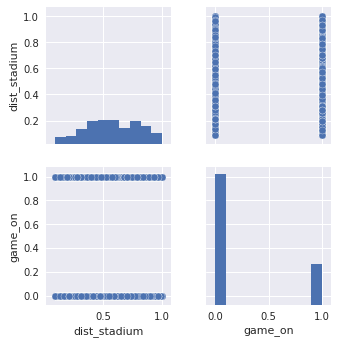

In [140]:
sns.pairplot(df1m)

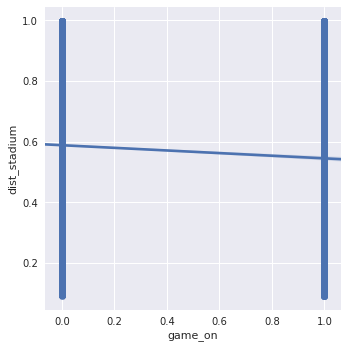

In [141]:
sns.lmplot(x='game_on',y='dist_stadium', data=df1m)

In [142]:
from sklearn.cross_validation import train_test_split

X = df1m[['dist_stadium']]

y = df1m['game_on']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3,
                                random_state=42)

# train model

In [143]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
model =  LinearRegression()


# train fit model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evalueate model

In [144]:
print(model.intercept_)
print(model.coef_)

0.3185654549829047
[-0.13863178]


## Create a dataframe from coeff

In [145]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
dist_stadium,-0.138632


## Predictions from our test

In [146]:
predictions = model.predict(X_test)

## Pefrorm scatteplot                                

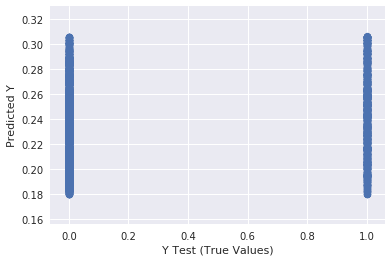

In [149]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


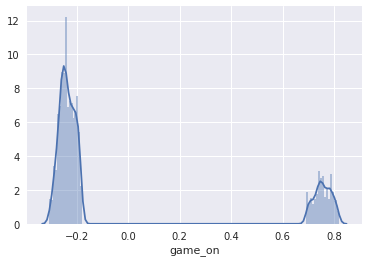

In [151]:
# histogram of the residuals
sns.distplot((y_test - predictions),bins='auto')

## Calculate metrics

In [165]:
from sklearn import metrics

## MAE
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
- mean of the absolute error
- take your error and take the absolute value of it and average it out.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [159]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 0.35731384882098344


In [167]:
def L1(yHat, y):
    return np.sum(np.absolute(yHat - y))

L1(predictions,y_test)

1943.4300237373288

# MSE

**Mean Squared Error** (MSE) is the mean of the squared errors:

- mean of the squared errors
- popular b/c it punish larger errors
- more usefull in the real world  because it takes into account larger b/c its square them.


$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [160]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))


MSE: 0.17659073049132978


In [168]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size

MSE(y_test,predictions)

0.17659073049132978

# RMSE
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [162]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 0.42022699876534564


## RSQ


In [164]:
print('RSQ:', metrics.explained_variance_score(y_test, predictions))

RSQ: 0.010820939347433223
